In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

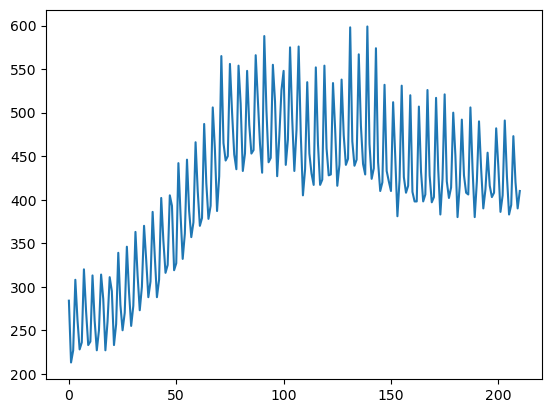

In [2]:
from pmdarima.datasets import load_ausbeer

# dados trimestrais
series = load_ausbeer(as_series=True)[:-1]

series.plot()

In [41]:
series.shape

(211,)

In [39]:
test.shape

(12,)

In [40]:
train.shape

(199,)

In [3]:
# divisao entre treino e validacao
from sklearn.model_selection import train_test_split

train, test = train_test_split(series, shuffle=False, test_size=12)

In [4]:
train.tail()

194    412.0
195    454.0
196    416.0
197    403.0
198    408.0
dtype: float64

In [5]:
test.head()

199    482.0
200    438.0
201    386.0
202    405.0
203    491.0
dtype: float64

In [6]:
# auto arima
import pmdarima as pm

?pm.auto_arima

model = pm.auto_arima(train, m=4, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[4]             : AIC=1637.011, Time=1.99 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=1839.622, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=1711.438, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=1650.320, Time=0.31 sec
 ARIMA(2,1,2)(0,1,1)[4]             : AIC=1635.094, Time=0.68 sec
 ARIMA(2,1,2)(0,1,0)[4]             : AIC=1672.502, Time=0.35 sec
 ARIMA(2,1,2)(0,1,2)[4]             : AIC=1636.712, Time=0.83 sec
 ARIMA(2,1,2)(1,1,0)[4]             : AIC=1659.862, Time=0.71 sec
 ARIMA(2,1,2)(1,1,2)[4]             : AIC=inf, Time=1.80 sec
 ARIMA(1,1,2)(0,1,1)[4]             : AIC=1633.200, Time=0.33 sec
 ARIMA(1,1,2)(0,1,0)[4]             : AIC=1690.721, Time=0.23 sec
 ARIMA(1,1,2)(1,1,1)[4]             : AIC=1635.150, Time=0.52 sec
 ARIMA(1,1,2)(0,1,2)[4]             : AIC=1635.123, Time=0.57 sec
 ARIMA(1,1,2)(1,1,0)[4]             : AIC=1668.364, Time=0.27 sec
 ARIMA(1,1,2)(1,1,2)[4]             : 

Signature:
pm.auto_arima(
    y,
    X=None,
    start_p=2,
    d=None,
    start_q=2,
    max_p=5,
    max_d=2,
    max_q=5,
    start_P=1,
    D=None,
    start_Q=1,
    max_P=2,
    max_D=1,
    max_Q=2,
    max_order=5,
    m=1,
    seasonal=True,
    stationary=False,
    information_criterion='aic',
    alpha=0.05,
    test='kpss',
    seasonal_test='ocsb',
    stepwise=True,
    n_jobs=1,
    start_params=None,
    trend=None,
    method='lbfgs',
    maxiter=50,
    offset_test_args=None,
    seasonal_test_args=None,
    suppress_warnings=True,
    error_action='trace',
    trace=False,
    random=False,
    random_state=None,
    n_fits=10,
    return_valid_fits=False,
    out_of_sample_size=0,
    scoring='mse',
    scoring_args=None,
    with_intercept='auto',
    sarimax_kwargs=None,
    **fit_args,
)
Docstring:
Automatically discover the optimal order for an ARIMA model.

The auto-ARIMA process seeks to identify the most optimal
parameters for an ``ARIMA`` model, settling o

In [7]:
model.summary()
# https://github.com/statsmodels/statsmodels/blob/db4336b6ef0de96312fbd7156aab4cb72207f768/statsmodels/tsa/statespace/mlemodel.py#L4598

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  199
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 4)   Log Likelihood                -811.649
Date:                             Thu, 21 Mar 2024   AIC                           1631.298
Time:                                     22:16:00   BIC                           1644.370
Sample:                                          0   HQIC                          1636.591
                                             - 199                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9893      0.062    -15.992      0.000      -1.111      -0.868
ma.L2          0.3659      0.063      5.767      0.000       0.242       0.490
ma.S.L4       -0.7273      0.049    -14.745      0.000      -0.824      -0.631
sigma2       247.2737     22.488     10.996      0.000     203.198     291.350
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 4.51
Prob(Q):                              0.86   Prob(JB):                         0.10
Heteroskedasticity (H):               2.18   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
from statsmodels.stats.stattools import jarque_bera

?jarque_bera

Signature: jarque_bera(resids, axis=0)
Docstring:
The Jarque-Bera test of normality.

Parameters
----------
resids : array_like
    Data to test for normality. Usually regression model residuals that
    are mean 0.
axis : int, optional
    Axis to use if data has more than 1 dimension. Default is 0.

Returns
-------
JB : {float, ndarray}
    The Jarque-Bera test statistic.
JBpv : {float, ndarray}
    The pvalue of the test statistic.
skew : {float, ndarray}
    Estimated skewness of the data.
kurtosis : {float, ndarray}
    Estimated kurtosis of the data.

Notes
-----
Each output returned has 1 dimension fewer than data

The Jarque-Bera test statistic tests the null that the data is normally
distributed against an alternative that the data follow some other
distribution. The test statistic is based on two moments of the data,
the skewness, and the kurtosis, and has an asymptotic :math:`\chi^2_2`
distribution.

The test statistic is defined

.. math:: JB = n(S^2/6+(K-3)^2/24)

where n 

In [9]:
from statsmodels.stats.diagnostic import acorr_ljungbox

?acorr_ljungbox

Signature:
acorr_ljungbox(
    x,
    lags=None,
    boxpierce=False,
    model_df=0,
    period=None,
    return_df=True,
    auto_lag=False,
)
Docstring:
Ljung-Box test of autocorrelation in residuals.

Parameters
----------
x : array_like
    The data series. The data is demeaned before the test statistic is
    computed.
lags : {int, array_like}, default None
    If lags is an integer then this is taken to be the largest lag
    that is included, the test result is reported for all smaller lag
    length. If lags is a list or array, then all lags are included up to
    the largest lag in the list, however only the tests for the lags in
    the list are reported. If lags is None, then the default maxlag is
    currently min((nobs // 2 - 2), 40). After 0.12 this will change to
    min(10, nobs // 5). The default number of lags changes if period
    is set.
boxpierce : bool, default False
    If true, then additional to the results of the Ljung-Box test also the
    Box-Pierce test re

In [10]:
from statsmodels.tsa.stattools import breakvar_heteroskedasticity_test

?breakvar_heteroskedasticity_test

Signature:
breakvar_heteroskedasticity_test(
    resid,
    subset_length=0.3333333333333333,
    alternative='two-sided',
    use_f=True,
)
Docstring:
Test for heteroskedasticity of residuals

Tests whether the sum-of-squares in the first subset of the sample is
significantly different than the sum-of-squares in the last subset
of the sample. Analogous to a Goldfeld-Quandt test. The null hypothesis
is of no heteroskedasticity.

Parameters
----------
resid : array_like
    Residuals of a time series model.
    The shape is 1d (nobs,) or 2d (nobs, nvars).
subset_length : {int, float}
    Length of the subsets to test (h in Notes below).
    If a float in 0 < subset_length < 1, it is interpreted as fraction.
    Default is 1/3.
alternative : str, 'increasing', 'decreasing' or 'two-sided'
    This specifies the alternative for the p-value calculation. Default
    is two-sided.
use_f : bool, optional
    Whether or not to compare against the asymptotic distribution
    (chi-squared) or the

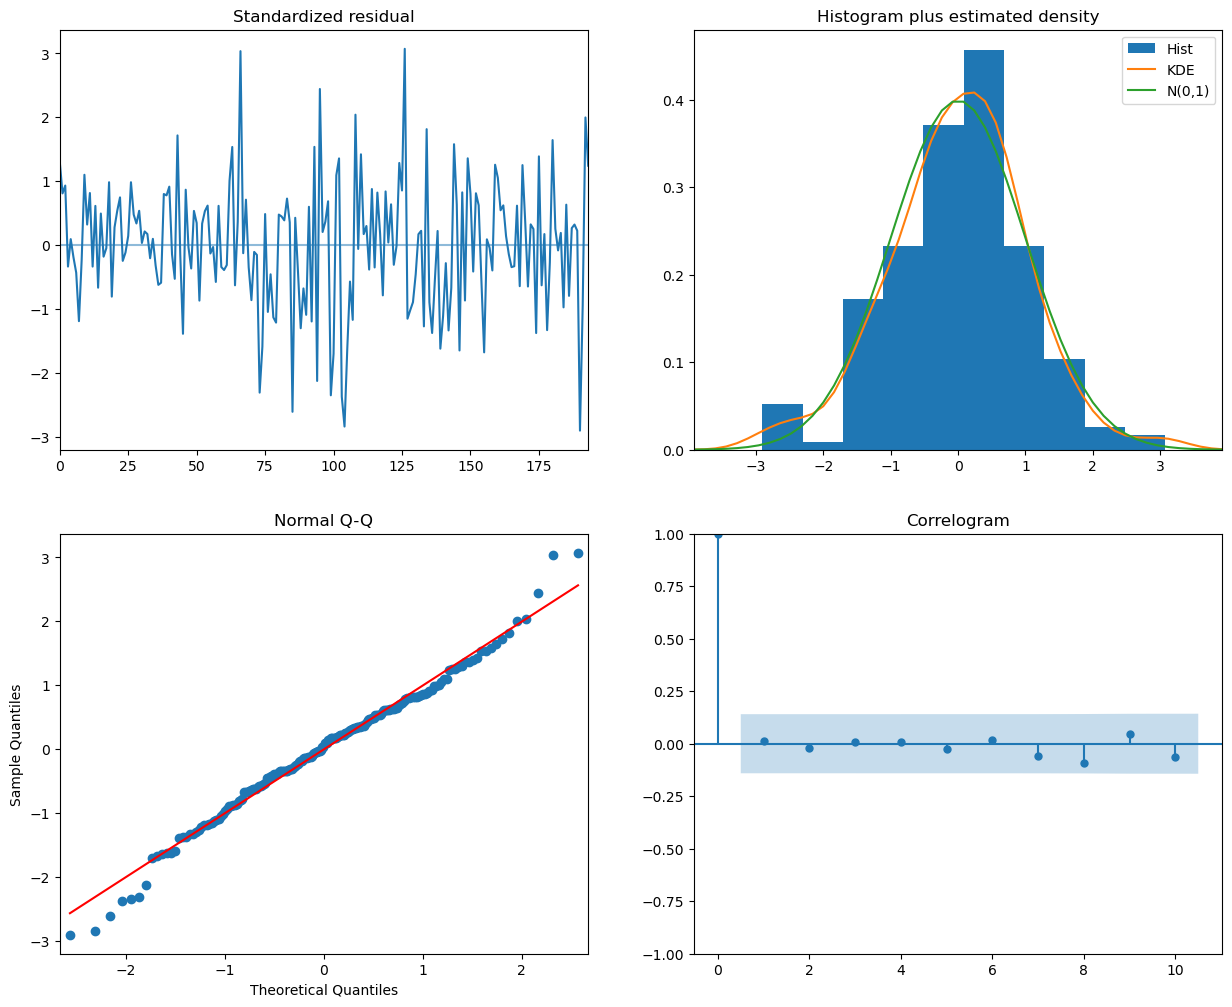

In [11]:
plot=model.plot_diagnostics(figsize=(15, 12))

In [42]:
forecasts = model.predict(12)
forecasts

Object `predict` not found.


199    476.596106
200    422.706576
201    388.363362
202    405.697110
203    479.989538
204    420.900349
205    386.557135
206    403.890883
207    478.183312
208    419.094123
209    384.750909
210    402.084657
dtype: float64

In [43]:
forescasts.shape

NameError: name 'forescasts' is not defined

<AxesSubplot:title={'center':'Forecasting with Auto Arima'}>

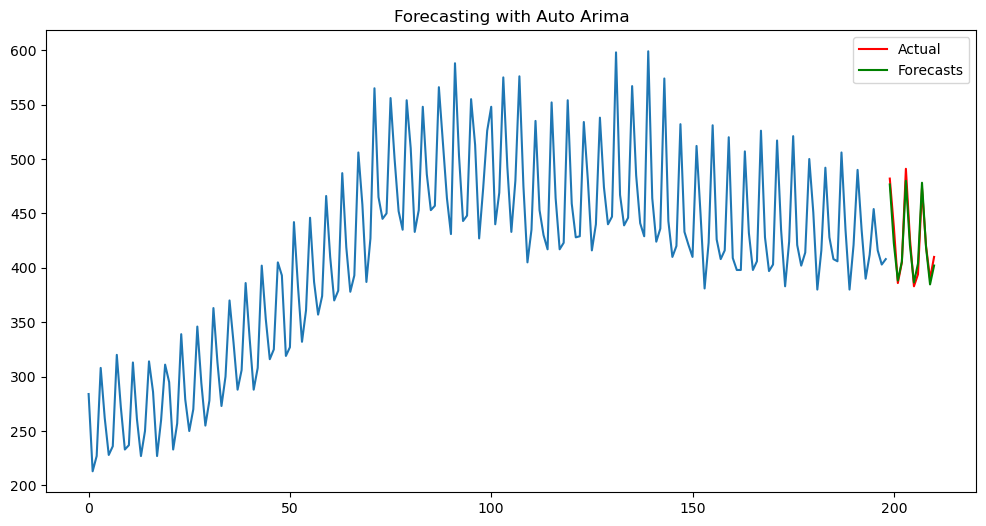

In [13]:
test = test.rename('Actual')
forecasts = pd.Series(forecasts, index=test.index).rename('Forecasts')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Forecasting with Auto Arima')
forecasts.plot(legend=True, color='green')

In [14]:
# computing the error
from src.error import MASE

err = MASE(train, test, forecasts)

err

0.10676319158353285

In [15]:
AR = pm.ARIMA(order=(1,0,0))
MA = pm.ARIMA(order=(0,0,1))

AR.fit(train)

ARIMA(order=(1, 0, 0))

In [16]:
AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  199
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1108.431
Date:                Thu, 21 Mar 2024   AIC                           2222.862
Time:                        22:16:04   BIC                           2232.742
Sample:                             0   HQIC                          2226.860
                                - 199                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    126.2832     26.234      4.814      0.000      74.866     177.700
ar.L1          0.6944      0.065     10.713      0.000       0.567       0.821
sigma2      3994.6958    541.275      7.380      0.000    2933.817    5055.575
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                21.20
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.79
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

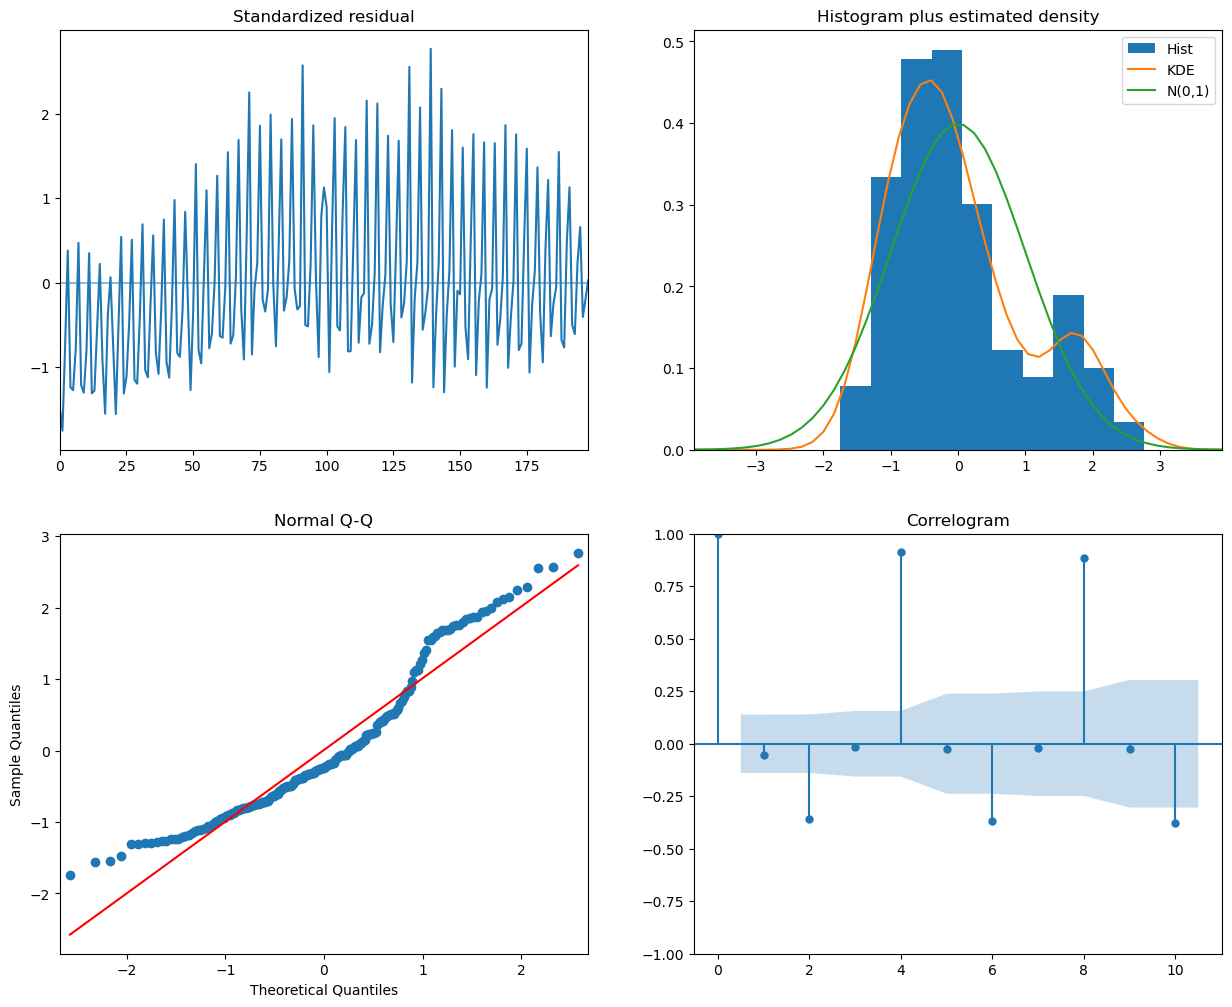

In [17]:
plot=AR.plot_diagnostics(figsize=(15, 12))

In [18]:
MA.fit(train)

MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  199
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1130.836
Date:                Thu, 21 Mar 2024   AIC                           2267.672
Time:                        22:16:06   BIC                           2277.552
Sample:                             0   HQIC                          2271.671
                                - 199                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    414.1556      9.185     45.090      0.000     396.153     432.158
ma.L1          0.5264      0.093      5.683      0.000       0.345       0.708
sigma2      5042.8875    561.254      8.985      0.000    3942.849    6142.925
===================================================================================
Ljung-Box (L1) (Q):                  14.90   Jarque-Bera (JB):                 4.56
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               0.56   Skew:                             0.36
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

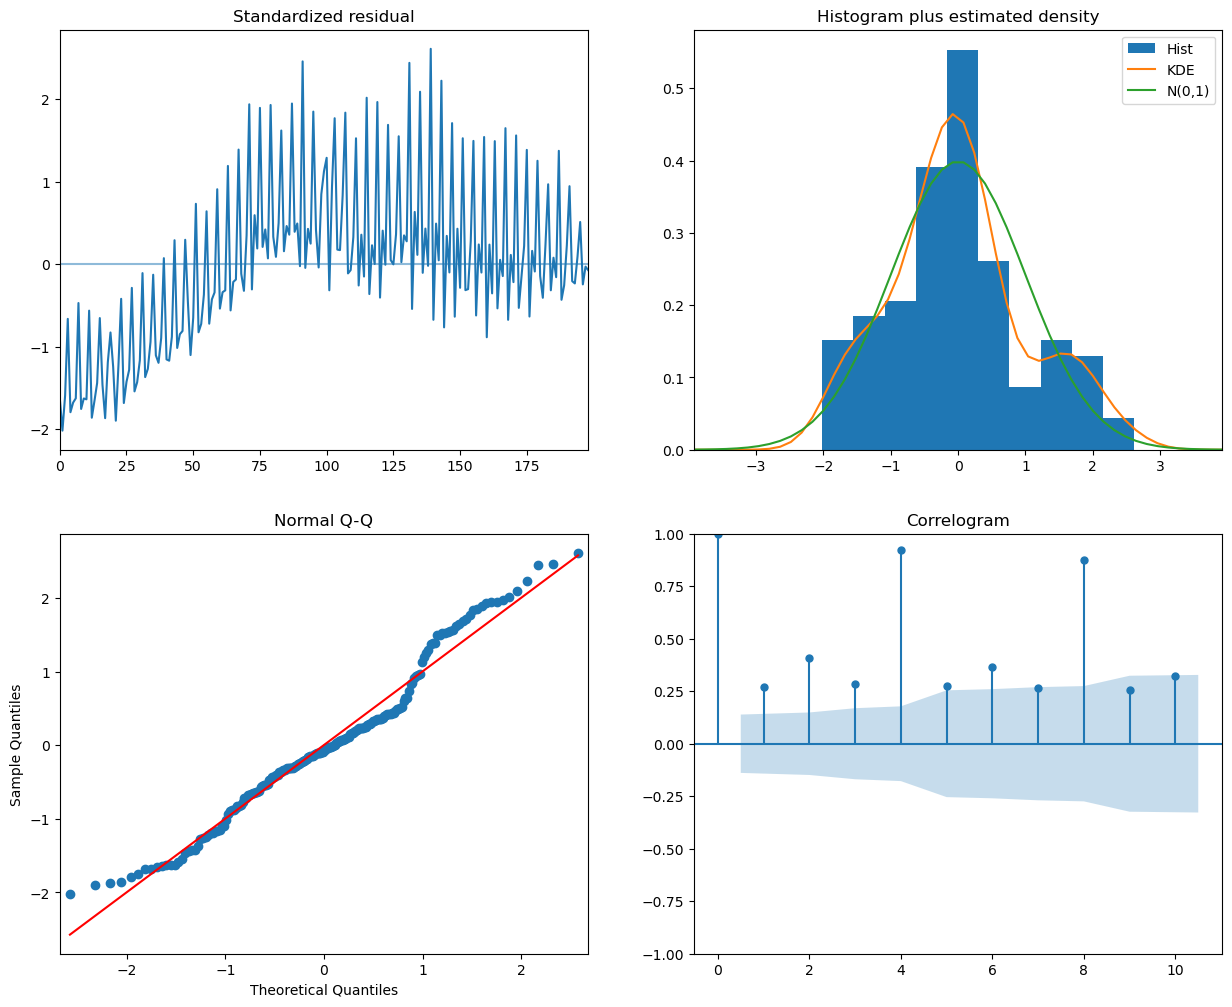

In [19]:
plot=MA.plot_diagnostics(figsize=(15, 12))

<AxesSubplot:title={'center':'Forecasting with AR'}>

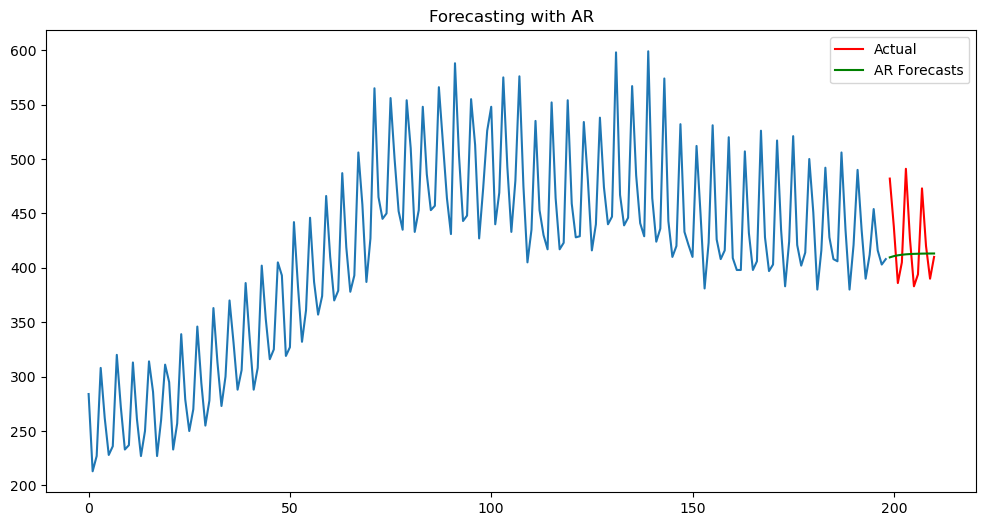

In [20]:
forecasts = AR.predict(12)
forecasts = pd.Series(forecasts, index=test.index).rename('AR Forecasts')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Forecasting with AR')
forecasts.plot(legend=True, color='green')

In [21]:
err = MASE(train, test, forecasts)

err

0.5327237201037394

## Exponential Smoothing

In [22]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
?ETSModel


ses_model_manual = SimpleExpSmoothing(train, initialization_method="heuristic").fit(smoothing_level=0.5, optimized=False)

ses_model_auto = SimpleExpSmoothing(train, initialization_method="estimated").fit()

Init signature:
ETSModel(
    endog,
    error='add',
    trend=None,
    damped_trend=False,
    seasonal=None,
    seasonal_periods=None,
    initialization_method='estimated',
    initial_level=None,
    initial_trend=None,
    initial_seasonal=None,
    bounds=None,
    dates=None,
    freq=None,
    missing='none',
)
Docstring:     
ETS models.

Parameters
----------
endog : array_like
    The observed time-series process :math:`y`
error : str, optional
    The error model. "add" (default) or "mul".
trend : str or None, optional
    The trend component model. "add", "mul", or None (default).
damped_trend : bool, optional
    Whether or not an included trend component is damped. Default is
    False.
seasonal : str, optional
    The seasonality model. "add", "mul", or None (default).
seasonal_periods : int, optional
    The number of periods in a complete seasonal cycle for seasonal
    (Holt-Winters) models. For example, 4 for quarterly data with an
    annual cycle or 7 for daily

In [23]:
ses_model_manual.summary()

Dep. Variable:,None,No. Observations:,199
Model:,SimpleExpSmoothing,SSE,677059.271
Optimized:,False,AIC,1622.310
Trend:,None,BIC,1628.896
Seasonal:,None,AICC,1622.516
Seasonal Periods:,None,Date:,"Thu, 21 Mar 2024"
Box-Cox:,False,Time:,22:16:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,252.66667,l.0,False


In [24]:
ses_model_auto.summary()

Dep. Variable:,None,No. Observations:,199
Model:,SimpleExpSmoothing,SSE,527116.390
Optimized:,True,AIC,1572.492
Trend:,None,BIC,1579.079
Seasonal:,None,AICC,1572.699
Seasonal Periods:,None,Date:,"Thu, 21 Mar 2024"
Box-Cox:,False,Time:,22:16:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1525276,alpha,True
initial_level,259.45158,l.0,True


In [25]:
ses_forecasts = ses_model_auto.forecast(12)

print(MASE(train,test,ses_forecasts))

0.5349966796478143


<AxesSubplot:title={'center':'Forecasting with SES'}>

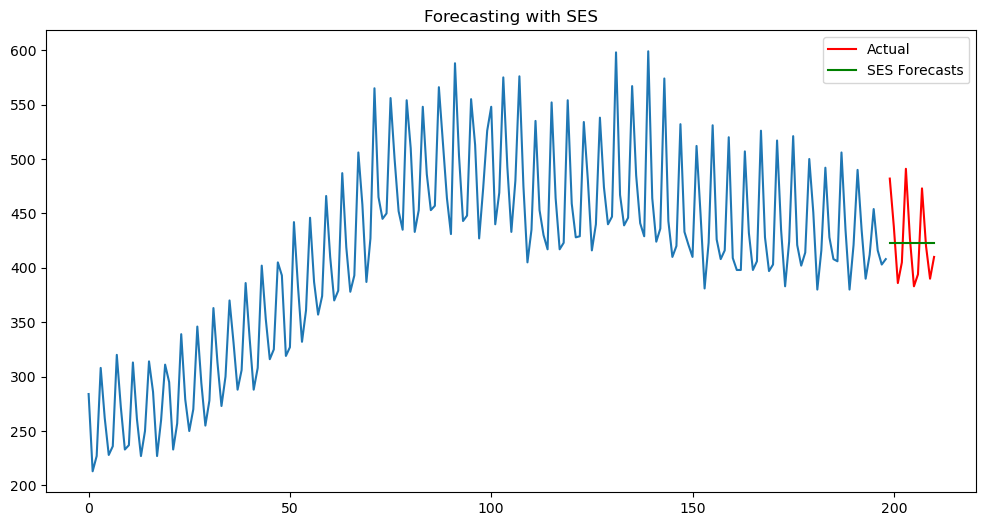

In [26]:
ses_forecasts = pd.Series(ses_forecasts, index=test.index).rename('SES Forecasts')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Forecasting with SES')
ses_forecasts.plot(legend=True, color='green')

## Método de Holt

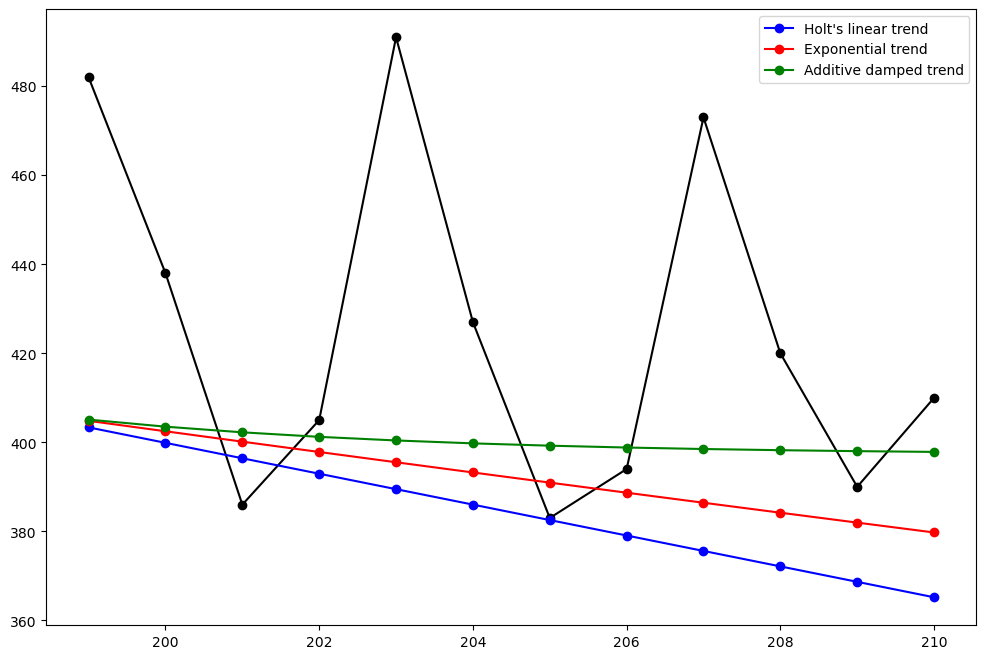

Init signature:
Holt(
    endog,
    exponential=False,
    damped_trend=False,
    initialization_method=None,
    initial_level=None,
    initial_trend=None,
)
Docstring:     
Holt's Exponential Smoothing

Parameters
----------
endog : array_like
    The time series to model.
exponential : bool, optional
    Type of trend component.
damped_trend : bool, optional
    Should the trend component be damped.
initialization_method : str, optional
    Method for initialize the recursions. One of:

    * None
    * 'estimated'
    * 'heuristic'
    * 'legacy-heuristic'
    * 'known'

    None defaults to the pre-0.12 behavior where initial values
    are passed as part of ``fit``. If any of the other values are
    passed, then the initial values must also be set when constructing
    the model. If 'known' initialization is used, then `initial_level`
    must be passed, as well as `initial_trend` and `initial_seasonal` if
    applicable. Default is 'estimated'. "legacy-heuristic" uses the sa

In [27]:
?Holt

holt_model1 = Holt(train, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
forecasts_holt_m1 = holt_model1.forecast(12).rename("Holt's linear trend")


holt_model2 = Holt(train, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
forecasts_holt_m2 = holt_model2.forecast(12).rename("Exponential trend")


holt_model3 = Holt(train, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)
forecasts_holt_m3 = holt_model3.forecast(12).rename("Additive damped trend")


plt.figure(figsize=(12, 8))
plt.plot(test, marker="o", color="black")
(line1,) = plt.plot(forecasts_holt_m1, marker="o", color="blue")
(line2,) = plt.plot(forecasts_holt_m2, marker="o", color="red")
(line3,) = plt.plot(forecasts_holt_m3, marker="o", color="green")
plt.legend([line1, line2, line3], [forecasts_holt_m1.name, forecasts_holt_m2.name, forecasts_holt_m3.name])

In [28]:
?ExponentialSmoothing
# Holt’s Winters Seasonal Exponential Smoothing
es = ExponentialSmoothing(
    train,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=False,
    initialization_method="estimated",
).fit()

forecasts_es = es.forecast(12).rename("Holt’s Winters Seasonal Exponential Smoothing")

Init signature:
ExponentialSmoothing(
    endog,
    trend=None,
    damped_trend=False,
    seasonal=None,
    *,
    seasonal_periods=None,
    initialization_method='estimated',
    initial_level=None,
    initial_trend=None,
    initial_seasonal=None,
    use_boxcox=False,
    bounds=None,
    dates=None,
    freq=None,
    missing='none',
)
Docstring:     
Holt Winter's Exponential Smoothing

Parameters
----------
endog : array_like
    The time series to model.
trend : {"add", "mul", "additive", "multiplicative", None}, optional
    Type of trend component.
damped_trend : bool, optional
    Should the trend component be damped.
seasonal : {"add", "mul", "additive", "multiplicative", None}, optional
    Type of seasonal component.
seasonal_periods : int, optional
    The number of periods in a complete seasonal cycle, e.g., 4 for
    quarterly data or 7 for daily data with a weekly cycle.
initialization_method : str, optional
    Method for initialize the recursions. One of:

    

0.11774959209661424


<AxesSubplot:title={'center':'Forecasting with ES'}>

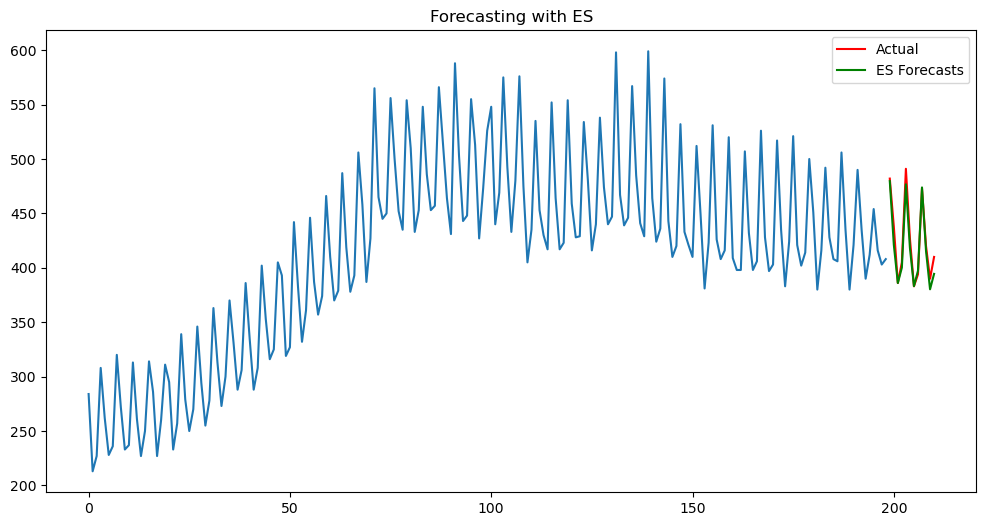

In [29]:
print(MASE(train,test,forecasts_es))

forecasts_es = forecasts_es.rename('ES Forecasts')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Forecasting with ES')
forecasts_es.plot(legend=True, color='green')

In [30]:
ets = ETSModel(
    train,
    seasonal_periods=4,
    trend="mul",
    seasonal="mul",
    initialization_method="estimated",
).fit()

forecasts_ets = ets.forecast(12).rename("ETS")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27848D+00    |proj g|=  2.41856D+00

At iterate    1    f=  4.89074D+00    |proj g|=  3.12247D+00

At iterate    2    f=  4.41986D+00    |proj g|=  1.47332D+00

At iterate    3    f=  4.35165D+00    |proj g|=  3.72882D-01

At iterate    4    f=  4.31564D+00    |proj g|=  6.62613D-01

At iterate    5    f=  4.24973D+00    |proj g|=  1.12448D+00

At iterate    6    f=  4.21114D+00    |proj g|=  1.06833D+00

At iterate    7    f=  4.20456D+00    |proj g|=  1.98159D-01

At iterate    8    f=  4.20195D+00    |proj g|=  8.87214D-02

At iterate    9    f=  4.20078D+00    |proj g|=  2.48869D-01

At iterate   10    f=  4.19991D+00    |proj g|=  2.24486D-01

At iterate   11    f=  4.19865D+00    |proj g|=  5.16681D-02

At iterate   12    f=  4.19845D+00    |proj g|=  4.50747D-02

At iterate   13    f=  4.1

In [31]:
ets.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  199
Model:                       ETS(AMM)   Log Likelihood                -834.491
Date:                Thu, 21 Mar 2024   AIC                           1688.983
Time:                        22:16:12   BIC                           1721.916
Sample:                             0   HQIC                          1702.312
                                - 199   Scale                          256.973
Covariance Type:               approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.2216      0.043      5.189      0.000       0.138       0.305
smoothing_trend        0.0397      0.016      2.554      0.011       0.009       0.070
smoothing_seasonal     0.2258      0.057      3.989      0.000       0.115       0.337
initial_level        270.9981   2.26e+04      0.012      0.990    -4.4e+04    4.45e+04
initial_trend          1.0014      0.009    106.443      0.000       0.983       1.020
initial_seasonal.0     1.1381     94.757      0.012      0.990    -184.583     186.859
initial_seasonal.1     0.8704     72.469      0.012      0.990    -141.167     142.908
initial_seasonal.2     0.8236     68.575      0.012      0.990    -133.580     135.227
initial_seasonal.3     1.0000     83.261      0.012      0.990    -162.189     164.189
===================================================================================
Ljung-Box (Q):                       17.89   Jarque-Bera (JB):                 2.85
Prob(Q):                              0.02   Prob(JB):                         0.24
Heteroskedasticity (H):               2.36   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

0.10477195066184922


<AxesSubplot:title={'center':'Forecasting with ETS'}>

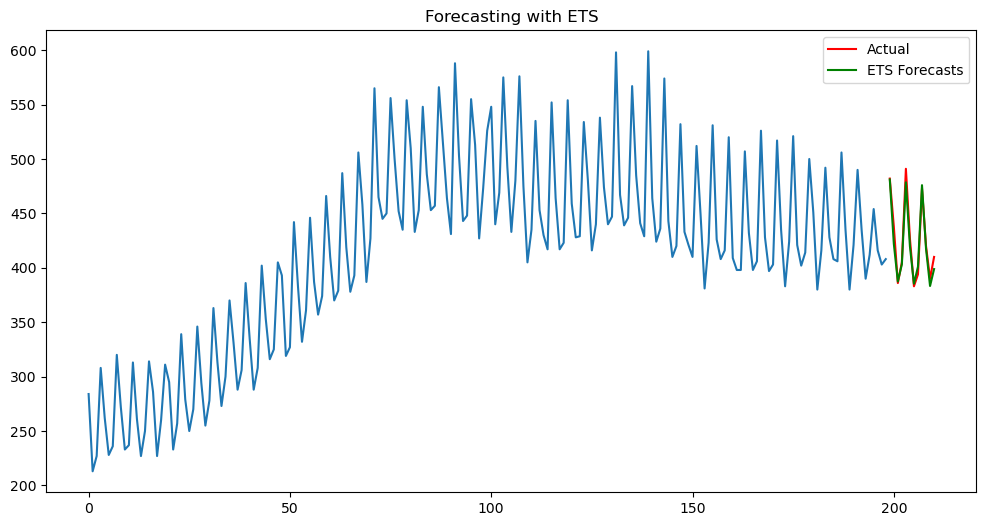

In [32]:
print(MASE(train,test,forecasts_ets))

forecasts_ets = forecasts_ets.rename('ETS Forecasts')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Forecasting with ETS')
forecasts_ets.plot(legend=True, color='green')

## Naive

In [33]:
from sktime.forecasting.naive import NaiveForecaster

?NaiveForecaster

naive = NaiveForecaster(strategy='mean')
naive.fit(train)

forecasts_naive = naive.predict(fh=[i for i in range(1,12)])

forecasts_naive

199    414.351759
200    414.351759
201    414.351759
202    414.351759
203    414.351759
204    414.351759
205    414.351759
206    414.351759
207    414.351759
208    414.351759
209    414.351759
dtype: float64

Init signature: NaiveForecaster(strategy='last', window_length=None, sp=1)
Docstring:     
Forecast based on naive assumptions about past trends continuing.

NaiveForecaster is a forecaster that makes forecasts using simple
strategies. Two out of three strategies are robust against NaNs. The
NaiveForecaster can also be used for multivariate data and it then
applies internally the ColumnEnsembleForecaster, so each column
is forecasted with the same strategy.

Internally, this forecaster does the following:
- obtains the so-called "last window", a 1D array that denotes the
  most recent time window that the forecaster is allowed to use
- reshapes the last window into a 2D array according to the given
  seasonal periodicity (prepended with NaN values to make it fit);
- make a prediction for each column, using the given strategy:
  - "last": last non-NaN row
  - "mean": np.nanmean over rows
- tile the predictions using the seasonal periodicity

To compute prediction quantiles, we first est

0.5677808567905491


<AxesSubplot:title={'center':'Forecasting with Naive'}>

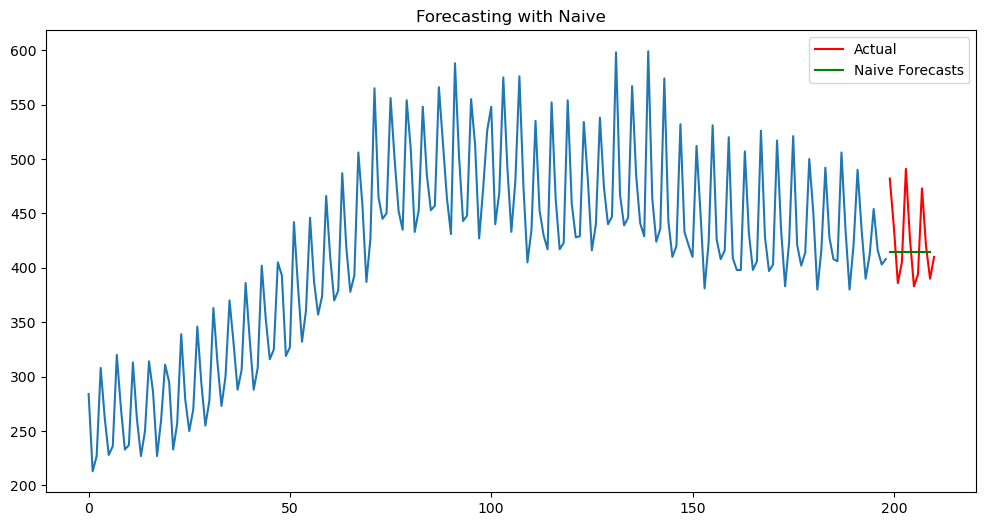

In [34]:
print(MASE(train,test,forecasts_naive))

forecasts_naive = forecasts_naive.rename('Naive Forecasts')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Forecasting with Naive')
forecasts_naive.plot(legend=True, color='green')

0.29762532981530343


<AxesSubplot:title={'center':'Forecasting with Seasonal Naive'}>

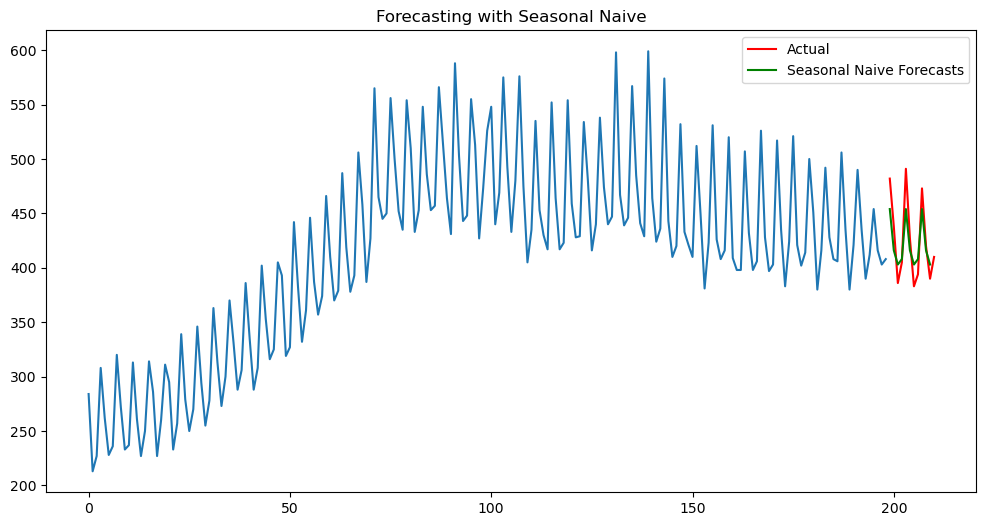

In [35]:
naive = NaiveForecaster(strategy='last', sp=4)
naive.fit(train)

forecasts_naive = naive.predict(fh=[i for i in range(1,12)])

print(MASE(train,test,forecasts_naive))

forecasts_naive = forecasts_naive.rename('Seasonal Naive Forecasts')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Forecasting with Seasonal Naive')
forecasts_naive.plot(legend=True, color='green')